# Spelling Correction

For later training, the Trainer with PyTorch requires accelerate>=0.20.1

In [1]:
! pip install accelerate -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 8.9 MB/s eta 0:00:00


In [2]:
import pandas as pd



## Loading data

In [3]:
# ! unzip spell_correction_task.zip

In [4]:
file_name = 'spell_correction_task.zip'
df = pd.read_csv(file_name, sep='\t')
df

,text,corrected
0,It is the headquurgers of Ughelly South LGA.,It is the headquarters of Ughelli South LGA.
1,"Upon completion of studies, he xeturned to Nig...","Upon completion of studies, he returned to Nig..."
2,"Bernie M. Farber (bgorn 1951) is j writer, com...","Bernie M. Farber (born 1951) is a writer, comm..."
3,The teafm fielded the Nos. 77 and 97 in the NA...,The team fielded the Nos. 77 and 97 in the NAS...
4,"This is a list of hoads ol state, heads of gov...","This is a list of heads of state, heads of gov..."
...,...,...
89995,These two versions have an albym cover similar...,These two versions have an album cover similar...
89996,"In 1992, Kostelka was nominated by then Presid...","In 1992, Kostelka was nominated by then Presid..."
89997,"The 2009 season continued wuith five roundm, i...","The 2009 season continued with five rounds, in..."
89998,Grae Dieu Manor is a 19th-century country hous...,Grace Dieu Manor is a 19th-century country hou...


## EDA

### Texts length distribution

Let's count the number of words in each sentence

In [5]:
df['num_words'] = df['text'].str.split().str.len()
df

,text,corrected,num_words
0,It is the headquurgers of Ughelly South LGA.,It is the headquarters of Ughelli South LGA.,8
1,"Upon completion of studies, he xeturned to Nig...","Upon completion of studies, he returned to Nig...",34
2,"Bernie M. Farber (bgorn 1951) is j writer, com...","Bernie M. Farber (born 1951) is a writer, comm...",24
3,The teafm fielded the Nos. 77 and 97 in the NA...,The team fielded the Nos. 77 and 97 in the NAS...,17
4,"This is a list of hoads ol state, heads of gov...","This is a list of heads of state, heads of gov...",18
...,...,...,...
89995,These two versions have an albym cover similar...,These two versions have an album cover similar...,24
89996,"In 1992, Kostelka was nominated by then Presid...","In 1992, Kostelka was nominated by then Presid...",31
89997,"The 2009 season continued wuith five roundm, i...","The 2009 season continued with five rounds, in...",13
89998,Grae Dieu Manor is a 19th-century country hous...,Grace Dieu Manor is a 19th-century country hou...,20


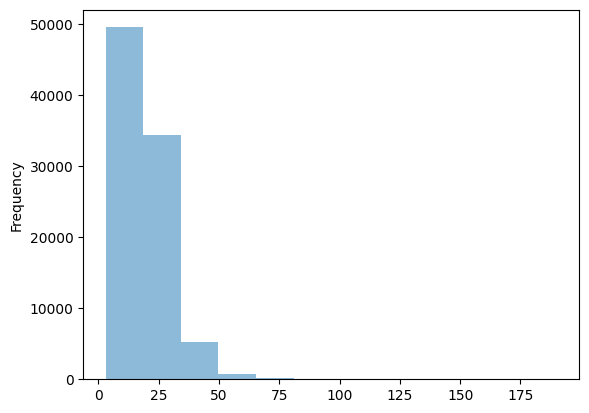

In [6]:
ax = df['num_words'].plot.hist(bins=12, alpha=0.5)

### Looking at Some Words

Tokenizing a sample the words

In [7]:
sample_df = df.sample(n=100)
sample_df

,text,corrected,num_words
80924,Fridnd of the Sea started as a project of the ...,Friend of the Sea started as a project of the ...,22
46519,The album's release was dewayed for some time ...,The album's release was delayed for some time ...,35
22897,In 1900 the 2nd Btttalion of the Voyal Welch F...,In 1900 the 2nd Battalion of the Royal Welch F...,45
20868,Philharmonia adusta i a moth in the Leciteocer...,Philharmonia adusta is a moth in the Lecithoce...,9
70158,It is the nog 2nd largest scjool disetrict in ...,It is the now 2nd largest school district in O...,19
...,...,...,...
25348,Despmte the club itbelf now bing implicated hn...,Despite the club itself not being implicated i...,19
40703,The Romans and the Achaeans were joindd outsid...,The Romans and the Achaeans were joined outsid...,16
9269,He has also produced shows such as Punoy US Co...,He has also produced shows such as Pinoy US Co...,15
16562,The 2008 United States presiduntial election i...,The 2008 United States presidential election i...,33


In [8]:
text_words = ''
corr_words = ''

for index, row in sample_df.iterrows():
      
    text = str(row['text'])
    corr = str(row['corrected'])
  
    text_tokens = text.split() 
    corr_tokens = corr.split() 
      
    for i in range(len(text_tokens)): 
        text_tokens[i] = text_tokens[i].lower() 
      
    text_words += " ".join(text_tokens)+" "

    for i in range(len(corr_tokens)): 
        corr_tokens[i] = corr_tokens[i].lower() 
      
    corr_words += " ".join(corr_tokens)+" "

Let's install the wordcload package

In [9]:
! pip install wordcloud -q

In [10]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

stopwords = set(STOPWORDS)

For the text column

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords,
                min_font_size = 10).generate(text_words)

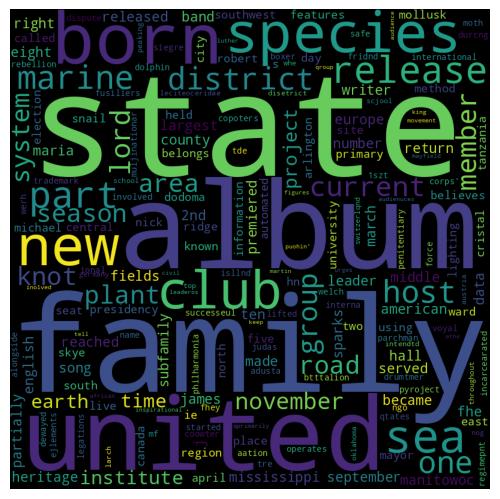

In [12]:
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

For the corrected column

In [13]:
wordcloud = WordCloud(width = 800, height = 800, 
                stopwords = stopwords,
                min_font_size = 10).generate(corr_words)

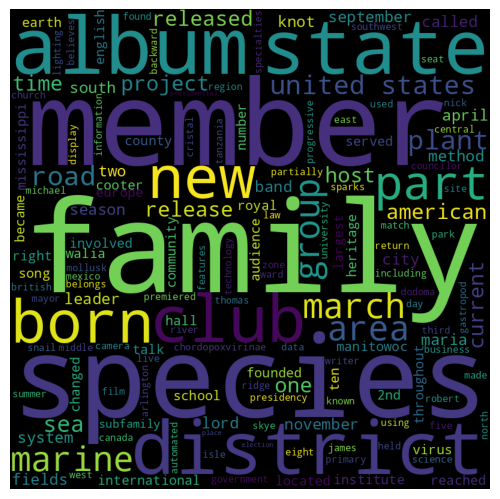

In [14]:
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

We can see that the input text and the corrected text use words, and that most of the words in the inout text are spelled correctly.

## Loading pre-trained model

We will use the T5 model from the happytransformer package

In [15]:
! pip install happytransformer -q 
! pip install evaluate -q           

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
from happytransformer import HappyTextToText

happy_tt = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


## Preprocess data

In [17]:
df.head()


,text,corrected,num_words
0,It is the headquurgers of Ughelly South LGA.,It is the headquarters of Ughelli South LGA.,8
1,"Upon completion of studies, he xeturned to Nig...","Upon completion of studies, he returned to Nig...",34
2,"Bernie M. Farber (bgorn 1951) is j writer, com...","Bernie M. Farber (born 1951) is a writer, comm...",24
3,The teafm fielded the Nos. 77 and 97 in the NA...,The team fielded the Nos. 77 and 97 in the NAS...,17
4,"This is a list of hoads ol state, heads of gov...","This is a list of heads of state, heads of gov...",18


To follow the model preprocessing, we will add 'grammer' prefix to the texts

In [18]:
df['grammer_text'] = 'grammer: ' + df['text'].astype(str)
df

,text,corrected,num_words,grammer_text
0,It is the headquurgers of Ughelly South LGA.,It is the headquarters of Ughelli South LGA.,8,grammer: It is the headquurgers of Ughelly Sou...
1,"Upon completion of studies, he xeturned to Nig...","Upon completion of studies, he returned to Nig...",34,"grammer: Upon completion of studies, he xeturn..."
2,"Bernie M. Farber (bgorn 1951) is j writer, com...","Bernie M. Farber (born 1951) is a writer, comm...",24,grammer: Bernie M. Farber (bgorn 1951) is j wr...
3,The teafm fielded the Nos. 77 and 97 in the NA...,The team fielded the Nos. 77 and 97 in the NAS...,17,grammer: The teafm fielded the Nos. 77 and 97 ...
4,"This is a list of hoads ol state, heads of gov...","This is a list of heads of state, heads of gov...",18,"grammer: This is a list of hoads ol state, hea..."
...,...,...,...,...
89995,These two versions have an albym cover similar...,These two versions have an album cover similar...,24,grammer: These two versions have an albym cove...
89996,"In 1992, Kostelka was nominated by then Presid...","In 1992, Kostelka was nominated by then Presid...",31,"grammer: In 1992, Kostelka was nominated by th..."
89997,"The 2009 season continued wuith five roundm, i...","The 2009 season continued with five rounds, in...",13,grammer: The 2009 season continued wuith five ...
89998,Grae Dieu Manor is a 19th-century country hous...,Grace Dieu Manor is a 19th-century country hou...,20,grammer: Grae Dieu Manor is a 19th-century cou...


The tokenizer is called inside the happytransformer methods `generate_text` and `train` below.

## Train / Test split

Splitting to train and test using a random split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['grammer_text'], df['corrected'], test_size=0.2, random_state=6)

In [32]:
print(f'The train set contains {len(X_train)} samples')
print(f'The test set contains {len(X_test)} samples')

The train set contains 72000 samples
The test set contains 18000 samples


Let's see an example

In [21]:
print('Input:\t\t', X_train[0])
print('Correction:\t', y_train[0])

Input:		 grammer: It is the headquurgers of Ughelly South LGA.
Correction:	 It is the headquarters of Ughelli South LGA.


Generating corrections

In [22]:
from happytransformer import TTSettings

# Based on EDA, we can see that the corrected texts include 50 words at the most.
beam_settings =  TTSettings(num_beams=3, min_length=1, max_length=50)

In [23]:
example_1 = X_test.iloc[0]
ground_truth_1 = y_test.iloc[0]
result_1 = happy_tt.generate_text(example_1, args=beam_settings)


In [24]:
print('Input:\t\t\t', example_1)
print('Original Correction:\t', ground_truth_1)
print('Generated Correction:\t', result_1.text)

Input:			 grammer: Initially it was an offshoot oif The Allman Brothers Baqd, but as tensions grew between the loss okf two of zts foundiung mhembers ano pelsonal grlievacces betxween Gregg Allman and other bandmatys and associates, Sea Level took on a life of lts own as an independent band.
Original Correction:	 Initially it was an offshoot of The Allman Brothers Band, but as tensions grew between the loss of two of its founding members and personal grievances between Gregg Allman and other bandmates and associates, Sea Level took on a life of its own as an independent band.
Generated Correction:	 as tensions grew, sea level took on a life of lts own as an independent band . the band was initially an offshoot of The Allman Brothers Baqd .


The model's correction is not very good. Let's generate some more corrections.

Defining a function that predicts a correction using a given model

In [25]:
def create_input_for_wer(X, model, beam_settings):
    """
    Creates list of predictions
    """
    
    preds = []
    for example in X:
        preds.append(model.generate_text(example, args=beam_settings).text)
    return preds


Let's generate some example

In [26]:
example_preds = create_input_for_wer(X_test[:5], happy_tt, beam_settings)

As we can see, the model does not generate good corrections

In [27]:
i = 1
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', y_test.tolist()[i])
print('Generated Correction:\t ', example_preds[i])

Input:		 grammer: In addition to his online publocations, he has publkshed in such magazies as Drubal Watchdog, Maximum Linux, Raspberry Pi Geqk, UFbuntu User, and The Tlw Internationaliqt, and writes one column about the command ine and another about open hardware for Linux Pro Magazine.
Original Correction:	  In addition to his online publications, he has published in such magazines as Drupal Watchdog, Maximum Linux, Raspberry Pi Geek, Ubuntu User, and The New Internationalist, and writes one column about the command line and another about open hardware for Linux Pro Magazine.
Generated Correction:	  False


In [28]:
i = 2
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', y_test.tolist()[i])
print('Generated Correction:\t ', example_preds[i])

Input:		 grammer: He previously playerd in MLB for the Los Angesles Dodgers, Rcicago White Scx awd Los Angeles Angels.
Original Correction:	  He previously played in MLB for the Los Angeles Dodgers, Chicago White Sox and Los Angeles Angels.
Generated Correction:	  he previously played in MLB for the Los Angesles Dodgers, Rcicago White Scx awd Los Angeles Angels.


In [29]:
i = 3
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', y_test.tolist()[i])
print('Generated Correction:\t ', example_preds[i])

Input:		 grammer: Skartlris is a fictpional Hollow Earth fantasy setting created by Mike Grell for the scord and sorcery comic book The Zarlord: published by DC Comics.
Original Correction:	  Skartaris is a fictional Hollow Earth fantasy setting created by Mike Grell for the sword and sorcery comic book The Warlord, published by DC Comics.
Generated Correction:	  grammer: Skartlris is a fictpional Hollow Earth fantasy setting created by Mike Grell for the scord and sorcery comic book The Zarlord: published by DC Comics


### Evaluating the model

WER is a Word Ratio Error - the number of errors divided by the number of words. A lower WER means better accuracy. We will use the *jiwer* package to calculate the WER matric

In [30]:
! pip install jiwer -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.0 MB/s eta 0:00:00


Let's create a sample of 500 examples to evaluate the model (running on all test set did not finish after a half of hour)

In [33]:
# Takes about 8 minutes
ground_truth = y_test[:1000].tolist()
preds = create_input_for_wer(X_test.iloc[:1000], happy_tt, beam_settings)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [34]:
from jiwer import wer

error = wer(ground_truth, preds)
print('Error:', error)

Error: 0.5582783537543198


We got quite high WER. Let's see if it improves after fine-tuning.

## Fine-tuning

Credit: https://www.vennify.ai/fine-tune-grammar-correction/

In order to fine tune a HappyTransformer model, we need to create a CSV file with 2 columns: *input* and *target*

In [35]:
# Train
train_df =  pd.concat([X_train, y_train], axis=1)
train_df.columns = ['input', 'target']
train_csv = train_df.to_csv('train.csv', index=False)

In [36]:
! head train.csv

input,target
grammer: The Pauk class is the NATO reporting name for a class of small patrol corvettes built for the Soviet Navy ald export wustomers between 1977 and 1989.,The Pauk class is the NATO reporting name for a class of small patrol corvettes built for the Soviet Navy and export customers between 1977 and 1989.
"grammer: Born vn Auckland, New Zealand, he atteded Palmerston Nnrth Boys High, Auckland Grammaq and the Univorsity of Auckland.","Born in Auckland, New Zealand, he attended Palmerston North Boys High, Auckland Grammar and the University of Auckland."
grammer: Shahid Navvab Safaoi XExpressway soarts from Tohid Tunnel and is Chamran Expressway renamyed after passing the tunnel.,Shahid Navvab Safavi Expressway starts from Tohid Tunnel and is Chamran Expressway renamed after passing the tunnel.
"grammer: The upper portion above Rahway consists of floodplains, woodlands and freshwater marshes; be lower portion inrludles saltwater macshes and tidal flats.","The upper portion

In [37]:
print('Number of training samples:')
print(train_df.shape[0])

Number of training samples:
72000


Let's train our model

In [38]:
from happytransformer import TTTrainArgs

args = TTTrainArgs(batch_size=8)
happy_tt.train("train.csv", args=args)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-789360e9b0f253ae/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/72000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.463000
1000,0.349600
1500,0.326700
2000,0.305400
2500,0.292300
3000,0.294900
3500,0.280400
4000,0.276100
4500,0.274500
5000,0.271000


We can see that the model does not improve much after step 21,500

Let's evaluate the trained model

In [39]:
ground_truth = y_test[:1000].tolist()
preds = create_input_for_wer(X_test.iloc[:1000], happy_tt, beam_settings)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [40]:
error = wer(ground_truth, preds)
print('Error:', error)

Error: 0.09435542988794639


We improved the WER from 0.55 to 0.09 after the fine tuning.


Let's see some examples

In [41]:
i = 100
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', ground_truth[i])
print('Generated Correction:\t ', preds[i])

Input:		 grammer: Sepx is a commune in the Haute-Galonne deyartment in southwestern France.
Original Correction:	  Sepx is a commune in the Haute-Garonne department in southwestern France.
Generated Correction:	  Sepx is a commune in the Haute-Galonne department in southwestern France.


In [42]:
i = 17
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', ground_truth[i])
print('Generated Correction:\t ', preds[i])

Input:		 grammer: For instancle, laaval amphibians whanged their antipredator behavior within an hour after a change in cues from predatbrs, dut morphglogical changes in body and tail shape in response to the same cues required a week to complete.
Original Correction:	  For instance, larval amphibians changed their antipredator behavior within an hour after a change in cues from predators, but morphological changes in body and tail shape in response to the same cues required a week to complete.
Generated Correction:	  For instance, larval amphibians changed their antipredator behavior within an hour after a change in cues from predators, and morphological changes in body and tail shape in response to the same cues


Sometimes the prediction is not accurate, like in the actress name

In [43]:
i = 0
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', ground_truth[i])
print('Generated Correction:\t ', preds[i])

Input:		 grammer: Initially it was an offshoot oif The Allman Brothers Baqd, but as tensions grew between the loss okf two of zts foundiung mhembers ano pelsonal grlievacces betxween Gregg Allman and other bandmatys and associates, Sea Level took on a life of lts own as an independent band.
Original Correction:	  Initially it was an offshoot of The Allman Brothers Band, but as tensions grew between the loss of two of its founding members and personal grievances between Gregg Allman and other bandmates and associates, Sea Level took on a life of its own as an independent band.
Generated Correction:	  Initially it was an offshoot of The Allman Brothers Band, but as tensions grew between the loss of two of its founding members and personal friendships between Gregg Allman and other musicians and associates, Sea Level


And sometimes the model replaces the mis-spelled word in a different word, like in the word "brseakigg" that was replaced with "cutting"

In [44]:
i = 6
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', ground_truth[i])
print('Generated Correction:\t ', preds[i])

Input:		 grammer: The use of logograms in writing ix called logography.
Original Correction:	  The use of logograms in writing is called logography.
Generated Correction:	  The use of logograms in writing is called logography.


Or in the word "powerfcul" that was replaced with "statutory".

In [45]:
i = 3
print('Input:\t\t', X_test.tolist()[i])
print('Original Correction:\t ', ground_truth[i])
print('Generated Correction:\t ', preds[i])

Input:		 grammer: Skartlris is a fictpional Hollow Earth fantasy setting created by Mike Grell for the scord and sorcery comic book The Zarlord: published by DC Comics.
Original Correction:	  Skartaris is a fictional Hollow Earth fantasy setting created by Mike Grell for the sword and sorcery comic book The Warlord, published by DC Comics.
Generated Correction:	  Arklis is a fictional Hollow Earth fantasy setting created by Mike Grell for the horror and sorcery comic book The Zarlord, published by DC Comics.
